https://threws.com/a-beginners-guide-to-fuzzy-logic-controllers-for-ac-temperature-control/

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=c4f0b8de13e89f773f4a1f12af81e98fcd75e78879e395a1c832d3562554bcdb
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Entered temperature:  31
Fan speed:  2.4977401129943497
Recommended fan speed:  low


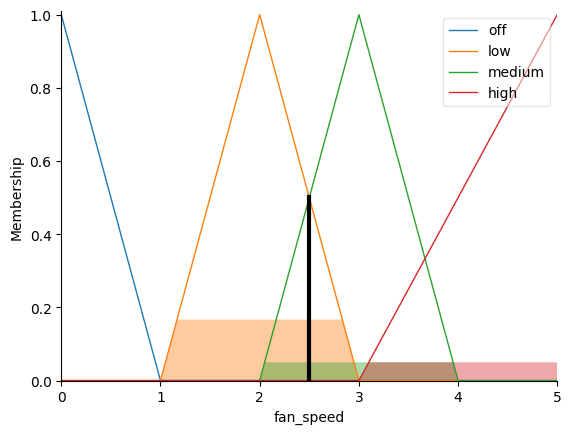

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 6, 1), 'fan_speed')

temperature['cool'] = fuzz.trimf(temperature.universe, [0, 18, 18])
temperature['warm'] = fuzz.trimf(temperature.universe, [16, 26, 32])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

fan_speed['off'] = fuzz.trimf(fan_speed.universe, [0, 0, 0])
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [1, 2, 3])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [2, 3, 4])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [3, 5, 5])

rule1 = ctrl.Rule(temperature['cool'], fan_speed['off'])
rule2 = ctrl.Rule(temperature['warm'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])
rule4 = ctrl.Rule(temperature['warm'] & temperature['hot'], fan_speed['medium'])
rule5 = ctrl.Rule(temperature['cool'] & temperature['warm'], fan_speed['low'])

fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulation = ctrl.ControlSystemSimulation(fan_ctrl)

temperature_input = 31
simulation.input['temperature'] = temperature_input
simulation.compute()

fan_speed_fuzzy = simulation.output['fan_speed']

fan_speed_memberships = {}
for label in fan_speed.terms:
  membership = fuzz.interp_membership(fan_speed.universe, fan_speed[label].mf, fan_speed_fuzzy)
  fan_speed_memberships[label] = membership

best_speed = max(fan_speed_memberships, key=fan_speed_memberships.get)
print("Entered temperature: ", temperature_input)
print("Fan speed: ", fan_speed_fuzzy)
print("Recommended fan speed: ", best_speed)
fan_speed.view(sim=simulation)


# Ventilator based on temp and humidity

https://qfie.readthedocs.io/en/latest/Fan_Speed_Control.html  

https://www.kaggle.com/code/somafatima/ac-controller-102

Do you want to turn on the fan? (yes/no)yes
What is the air temperature in °C?35
What is the air humidity in %?17
Entered temperature:  35
Entered humidity:  17
Fan speed:  4.1190476190476195
Recommended fan speed:  high


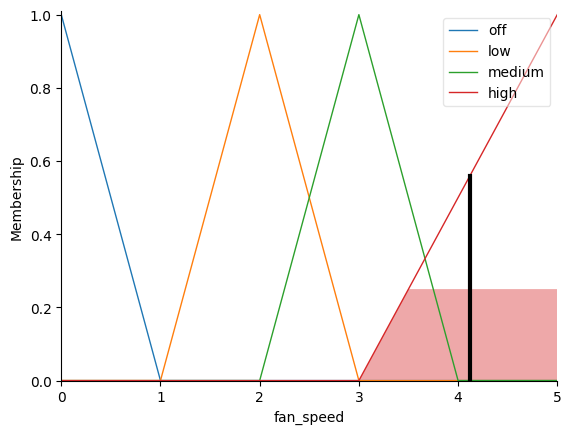

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 6, 1), 'fan_speed')

temperature['cool'] = fuzz.trimf(temperature.universe, [0, 18, 18])
temperature['warm'] = fuzz.trimf(temperature.universe, [16, 26, 32])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

fan_speed['off'] = fuzz.trimf(fan_speed.universe, [0, 0, 0])
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [1, 2, 3])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [2, 3, 4])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [3, 5, 5])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

rule1 = ctrl.Rule(temperature['cool'], fan_speed['off'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])
rule4 = ctrl.Rule(temperature['warm'] & temperature['hot'], fan_speed['medium'])
rule5 = ctrl.Rule(temperature['cool'] & temperature['warm'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'] & humidity['low'], fan_speed['low'])
rule6 = ctrl.Rule(temperature['warm'] & (humidity['medium'] | humidity['high']), fan_speed['medium'])

fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
simulation = ctrl.ControlSystemSimulation(fan_ctrl)

response = input("Do you want to turn on the fan? (yes/no)")
if response.lower() == 'yes':
    temperature_input = int(input("What is the air temperature in °C?"))
    humidity_input = int(input("What is the air humidity in %?"))
    simulation.input['temperature'] = temperature_input
    simulation.input['humidity'] = humidity_input
    simulation.compute()
    fan_speed_fuzzy = simulation.output['fan_speed']
    fan_speed_memberships = {}
    for label in fan_speed.terms:
        membership = fuzz.interp_membership(fan_speed.universe, fan_speed[label].mf, fan_speed_fuzzy)
        fan_speed_memberships[label] = membership
    best_speed = max(fan_speed_memberships, key=fan_speed_memberships.get)
    print("Entered temperature: ", temperature_input)
    print("Entered humidity: ", humidity_input)
    print("Fan speed: ", fan_speed_fuzzy)
    print("Recommended fan speed: ", best_speed)
    fan_speed.view(sim=simulation)
else:
    print("The fan remains off")
